# Avocado Sales Analysis - Jie Guo



# Objective of the Proposed Research:

It is well known that Avocado has a lot of nutrients. Avocado becomes popular especially among Millenials in recent years. So there is a question: Which city has the cheapest price of avocado? When is a good time to buy cheap avocado? So we get the data on Kaggle. The original data comes directly from retailers' cash registers based on actual retail sales of Hass avocados.

The data has 13 columns. We will explore this data set and make the following researches:

1.Get the average avocado price during 2015-2018 in different regions.

2.Find the trend of avocado price in different years in the lowest three regions about avocado price

3.More detail in San Francisco: We can get the trend of avocado prices in different years in SF.

4.Find The percentages of different types of avocado in SF2018.

5.Find the clusters of "conventional" and "organic" with average price and volume.

Finally, we will give suggestions about which region are good choices to buy avocado. 
And we will tell when avocado has the lowest price in San Francisco. Also, we can give a cluster of "conventional" and "organic" with average price and volume.
Import pandas, NumPy, and CSV called "avocado". The dataframe is also called "avocado".


Import pandas, numpy and csv called "avocado". The dataframe is also called "avocado".

In [1]:
import pandas as pd
import numpy as np

avocado=pd.read_csv("avocado.csv")

# Data Exploration

Show top 5 rows of the dataset.

In [2]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Show dimension

In [3]:
avocado.shape

(18249, 14)

Show type of data in each column and the number of NA.

In [4]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Show basic statistic information

In [5]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Data Cleaning 

According to our research, we drop "Total Bags","Small Bags", "Large Bags" and "XLarge Bags".

In [6]:
avocado=avocado[["year","Date","AveragePrice","Total Volume","4046","4225","4770","type","region"]]
avocado.head()

,year,Date,AveragePrice,Total Volume,4046,4225,4770,type,region
0,2015,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,Albany
1,2015,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,Albany
2,2015,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,Albany
3,2015,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,Albany
4,2015,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,Albany


# Adaptation

## Add a column called No_label

This column means the avocados that are not "4046","4225" or "4770".

In [7]:
avocado["No_label"]=avocado.iloc[:,3]-avocado.iloc[:,4]-avocado.iloc[:,5]-avocado.iloc[:,6]
avocado.head()

,year,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,No_label
0,2015,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,Albany,8696.87
1,2015,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,Albany,9505.56
2,2015,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,Albany,8145.35
3,2015,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,Albany,5811.16
4,2015,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,Albany,6183.95


## Change the type column.
We change the string as numeric because if we want to have different color dots, we need the numeric parameter to assign the color. So we change the "conventional" type into 0 and the "organic" type equals 1. We use for loop and if statement. The "18249" is the length of the dataset. So I set for a loop as a range(18249).

In [8]:
j=0
for i in range(18249):
    if (avocado.iloc[i,7] =="conventional"):
        avocado.iloc[i,7]=0

    if (avocado.iloc[i,7] =="organic"):
        avocado.iloc[i,7]=1

avocado.head()

,year,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,No_label
0,2015,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,0,Albany,8696.87
1,2015,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,0,Albany,9505.56
2,2015,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,0,Albany,8145.35
3,2015,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,0,Albany,5811.16
4,2015,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,0,Albany,6183.95


# Visualization


## Visualization 1 : Average price from 2015 to 2018 in different region.

We assign "AveragePrice" and "region" from avocado in a new dataframe called avocado1.Then I use groupby() by 'region' and describe to get the names of region and the average price in each region.

In [9]:
avocado1=avocado[["AveragePrice","region"]]
avocado1.groupby('region').describe().head()

AveragePrice                                         \
                           count      mean       std   min   25%    50%   
region                                                                    
Albany                     338.0  1.561036  0.291986  0.85  1.35  1.560   
Atlanta                    338.0  1.337959  0.398297  0.62  1.04  1.230   
BaltimoreWashington        338.0  1.534231  0.299428  0.95  1.26  1.550   
Boise                      338.0  1.348136  0.457911  0.58  1.03  1.220   
Boston                     338.0  1.530888  0.328074  0.85  1.26  1.555   

                                   
                        75%   max  
region                             
Albany               1.8175  2.13  
Atlanta              1.6200  2.75  
BaltimoreWashington  1.7000  2.28  
Boise                1.6375  2.79  
Boston               1.8175  2.19

I input regions and averageprice into two list by hand. It's really tired for me! Then I assign the data into a dataframe called "v1_data". And order it in ascending order by "Average_price".

In [10]:
names=["Albany","Atlanta",
       "BaltimoreWashington","Boise","Boston","BuffaloRochester","California","Charlotte","Chicago","CincinnatiDayton",
"Columbus","DallasFtWorth","Denver","Detroit","GrandRapids","GreatLakes","HarrisburgScranton","HartfordSpringfield","Houston",
       "Indianapolis",
"Jacksonville","LasVegas","LosAngeles","Louisville","MiamiFtLauderdale","Midsouth","Nashville","NewOrleansMobile","NewYork","Northeast",
       "NorthernNewEngland",
"Orlando","Philadelphia","PhoenixTucson","Pittsburgh","Plains","Portland","RaleighGreensboro","RichmondNorfolk","Roanoke","Sacramento",
"SanDiego","SanFrancisco","Seattle","SouthCarolina","SouthCentral","Southeast","Spokane","StLouis","Syracuse","Tampa","TotalUS","West",
       "WestTexNewMexico"]

In [11]:
averageprice=[1.561036,1.337959,1.534231,1.348136,1.530888,1.516834,1.395325,1.606036,1.556775,1.209201,1.252781,1.085592,1.218580,1.276095,
 1.505000,1.338550,1.513284,1.818639,1.047929,1.313994,1.510947,1.380917,1.216006,1.286686,1.428491,1.404763,1.212101,1.304793,
 1.727574,1.601923,1.477396,1.506213,1.632130,1.224438,1.364320,1.436509,1.317722,1.555118,1.291331,1.247929,1.621568,1.398166,
 1.804201,1.442574,1.403284,1.101243,1.398018,1.445592,1.430621,1.520325,1.408846,1.319024,1.272219,1.261701
]

In [12]:
v1_data=pd.DataFrame()
v1_data["Names"]=names
v1_data["Average_price"]=averageprice
v1_data=v1_data.sort_values(by=['Average_price'], ascending = False)

In this part I use barplot to show Average price from 2015 to 2018 in different region.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


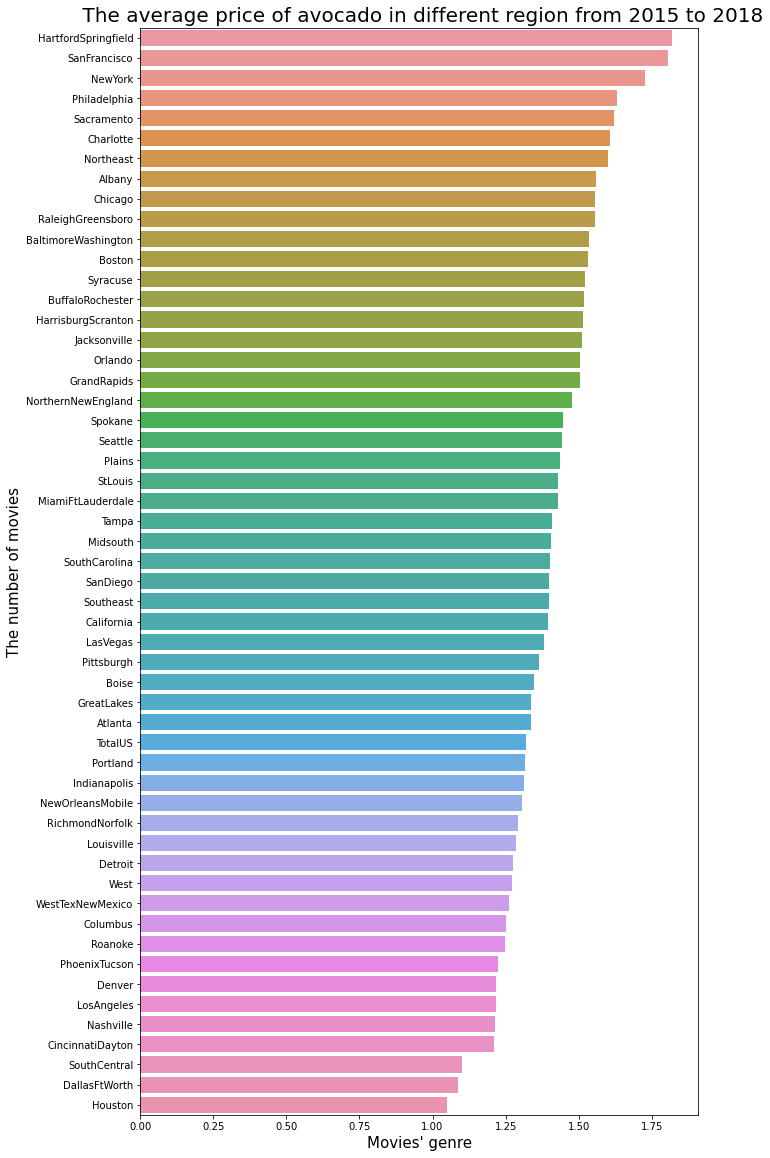

In [13]:
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt  
import seaborn as sns

plot1=plt.figure(figsize=(10,20))
sns.barplot(v1_data["Average_price"],v1_data["Names"])
plt.ylabel("The number of movies",fontsize=15)
plt.xlabel("Movies' genre",fontsize=15)
plt.title(" The average price of avocado in different region from 2015 to 2018",fontsize=20)

plt.show()

## Visualization 2 : The trend of avocado price from 2015 to 2018.
### SouthCentral

I use filter function to get "SouthCentral" data. Put the data that region is "SouthCentral" into a dataframe called "SouthCentral".

In [14]:
SouthCentral=avocado[avocado.region == "SouthCentral"]
SouthCentral.head()

,year,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,No_label
2340,2015,2015-12-27,0.81,4831664.77,2295315.43,1290847.05,392846.12,0,SouthCentral,852656.17
2341,2015,2015-12-20,0.81,4565207.85,2166801.03,1226508.86,412828.75,0,SouthCentral,759069.21
2342,2015,2015-12-13,0.78,4869309.42,2366879.80,1559601.21,271514.98,0,SouthCentral,671313.43
2343,2015,2015-12-06,0.76,4938526.47,2271088.12,1989750.87,38648.11,0,SouthCentral,639039.37
2344,2015,2015-11-29,0.82,3969578.89,2105670.46,1234911.39,27985.18,0,SouthCentral,601011.86


Then I define a defination called "average_price_get". The parameter df is used to input data.

In the def:
1. I select df("Region") as a variable called 'regionname'. It is used to show label in the following plot, which is so convenient. 

2. I use for loop and if statement to get the sum of "Average_price" called sum1-sum4 in different year. I only need to check first 4 character in a string,which comes from df("Date) to know which year does this row belong. 

3. Then I get the count called count1-count4 of each year. Then to get a list of average price, I use .append function. 

Finally, I return a list that has average_price and region name. 

In [15]:
#This is a function taht can get the avocado average price from 2015 to 2018.
#Central.

def average_price_get(df):
    regionname=df.iloc[0,8]
    average_price=[]
    sum1=sum2=sum3=sum4=0
    count1=count2=count3=count4=0
    for i in range(len(df)):
        date=df.iloc[i,1]

        if (date[0:4]=="2015"):
            count1=count1+1
            sum1=sum1+df.iloc[i,2]

        if (date[0:4]=="2016"):
            count2=count2+1
            sum2=sum2+df.iloc[i,2]

        if (date[0:4]=="2017"):
            count3=count3+1
            sum3=sum3+df.iloc[i,2]

        else:
            count4=count4+1
            sum4=sum4+df.iloc[i,2]

    average_price.append(sum1/count1)
    average_price.append(sum2/count2)
    average_price.append(sum3/count3)
    average_price.append(sum4/count4)
    return(average_price,regionname)


In [16]:
y=average_price_get(SouthCentral)

In this part I define a defination called "plot_get_average_price". The parameter y is used to input data to make a plot.

In the def:
1. I define a list called x that has 2015 to 2018.

2. I assign the first element of y as the y value of plot.

3. I assign the second element of y as the label of line. 

4. To show the specific value of y, I use np.round(y[0],2) to show them more clear.

5. I use for loop to put values above the dots.

Finally, I return plt.show() to show the plot.

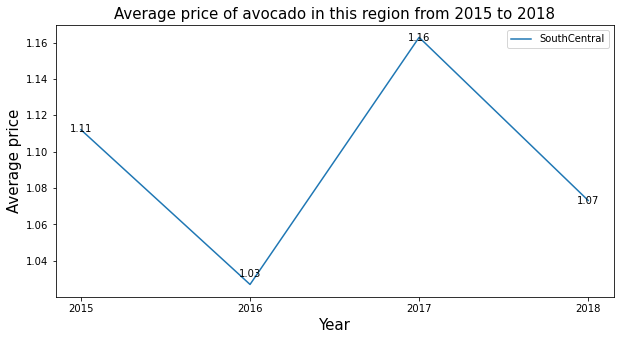

In [17]:
import matplotlib.pyplot as plt

def plot_get_average_price(y):
    x=["2015","2016","2017","2018"]

    fig = plt.figure(figsize=(10,5))

    plt.plot(x, y[0],ls="-",label=y[1])
    plt.title("Average price of avocado in this region from 2015 to 2018", fontsize=15)
    plt.xlabel("Year", fontsize=15)
    plt.ylabel("Average price", fontsize=15)
    y=np.round(y[0],2)
    for i in range(4):
        plt.text(i, y[i],y[i] ,ha='center',va= 'bottom', size = 10, alpha = 1)

    plt.legend()
    plt.show()
    return plt.show()

plot_get_average_price(y)

### DallasFtWorth

I use filter function to get "DallasFtWorth" data. Put the data that region is "DallasFtWorth" into a dataframe called "DallasFtWorth".The following codes are using the defination "average_price_get" and "plot_get_average_price" that I set before.

In [18]:
DallasFtWorth=avocado[avocado.region == "DallasFtWorth"]
DallasFtWorth.head(5)

,year,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,No_label
572,2015,2015-12-27,0.80,1020390.64,494425.64,276556.76,84912.97,0,DallasFtWorth,164495.27
573,2015,2015-12-20,0.82,928051.16,439792.68,257532.45,91158.34,0,DallasFtWorth,139567.69
574,2015,2015-12-13,0.79,980891.18,476178.99,319789.56,62436.80,0,DallasFtWorth,122485.83
575,2015,2015-12-06,0.74,1054849.97,514160.41,412692.22,8533.47,0,DallasFtWorth,119463.87
576,2015,2015-11-29,0.80,839818.87,477944.48,244879.52,6211.50,0,DallasFtWorth,110783.37


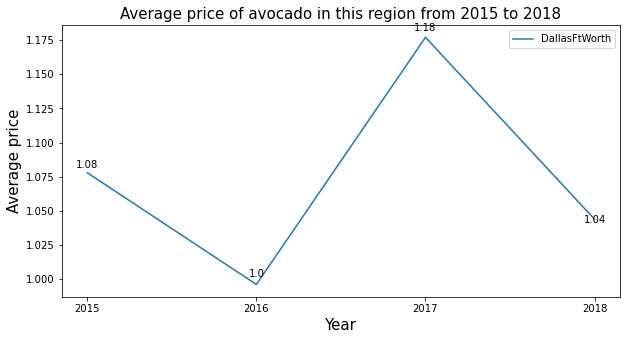

In [19]:
y=average_price_get(DallasFtWorth)
average_price_get(DallasFtWorth)
plot_get_average_price(y)

### Houston

I use filter function to get "Houston" data. Put the data that region is "Houston" into a dataframe called "Houston".The following codes are using the defination "average_price_get" and "plot_get_average_price" that I set before.

In [20]:
Houston=avocado[avocado.region == "Houston"]
Houston.head(5)

,year,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,No_label
936,2015,2015-12-27,0.78,944506.54,389773.22,288003.62,126150.81,0,Houston,140578.89
937,2015,2015-12-20,0.75,922355.67,382444.22,278067.11,127372.19,0,Houston,134472.15
938,2015,2015-12-13,0.73,998752.95,412187.80,386865.21,81450.04,0,Houston,118249.90
939,2015,2015-12-06,0.74,989676.85,368528.91,490805.00,7041.19,0,Houston,123301.75
940,2015,2015-11-29,0.79,783225.98,391616.95,289533.68,4334.89,0,Houston,97740.46


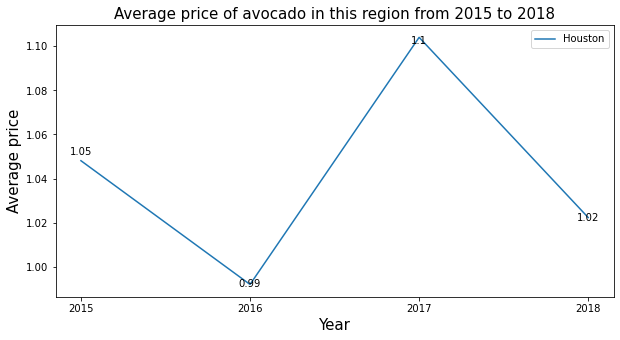

In [21]:
y=average_price_get(Houston)
average_price_get(Houston)
plot_get_average_price(y)

## Visualization 3: SanFrancisco

I use filter function to get "San Francisco" data. Put the data that region is "San Francisco" into a dataframe called "SF".

In [22]:
SF=avocado[avocado.region == "SanFrancisco"]
SF.head(5)

,year,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,No_label
2184,2015,2015-12-27,1.05,692206.40,181704.67,422617.80,28184.73,0,SanFrancisco,59699.20
2185,2015,2015-12-20,1.15,637091.48,173521.67,364622.31,33083.99,0,SanFrancisco,65863.51
2186,2015,2015-12-13,1.22,616016.46,127080.03,384958.63,34069.96,0,SanFrancisco,69907.84
2187,2015,2015-12-06,1.06,694982.49,102771.75,498975.34,37321.12,0,SanFrancisco,55914.28
2188,2015,2015-11-29,1.05,651638.60,102783.08,462966.47,31195.04,0,SanFrancisco,54694.01


### 2015 monthly average price in SF.

I put the data that year is 2015 into a dataframe called "SF2015".

In [23]:
SF2015=SF[SF.year==2015]
SF2015.head()

,year,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,No_label
2184,2015,2015-12-27,1.05,692206.40,181704.67,422617.80,28184.73,0,SanFrancisco,59699.20
2185,2015,2015-12-20,1.15,637091.48,173521.67,364622.31,33083.99,0,SanFrancisco,65863.51
2186,2015,2015-12-13,1.22,616016.46,127080.03,384958.63,34069.96,0,SanFrancisco,69907.84
2187,2015,2015-12-06,1.06,694982.49,102771.75,498975.34,37321.12,0,SanFrancisco,55914.28
2188,2015,2015-11-29,1.05,651638.60,102783.08,462966.47,31195.04,0,SanFrancisco,54694.01


Then I define a defination called "get_average_monthly_price". The parameter df is used to input data.

In the def: 

1. I use for loop and if statement to get the sum of "average_price" called sum1-sum12 in different month. I only need to check the characters in sixth position and seventh position, which means month number , in a string to know which month does this row belong to. 

2. Then I get the count called count1-count12 of each year. Then to get a list of average price, I use .append function. 

3. I set range(len(df)) because when the year is 2018, the length of data is not the same as 2015,2016 and 2017. So length should be diy.

Finally, I return a variable called average_price. 

In [24]:
#This is 2015 avocado average price in SF.

def get_average_monthly_price(df):
    average_price=[]
    sum1=sum2=sum3=sum4=sum5=sum6=sum7=sum8=sum9=sum10=sum11=sum12=0
    count1=count2=count3=count4=count5=count6=count7=count8=count9=count10=count11=count12=0
    for i in range(len(df)):
        date=df.iloc[i,1]

        if (date[5:7]=="01"):
            count1=count1+1
            sum1=sum1+df.iloc[i,2]

        if (date[5:7]=="02"):
            count2=count2+1
            sum2=sum2+df.iloc[i,2]

        if (date[5:7]=="03"):
            count3=count3+1
            sum3=sum3+df.iloc[i,2]

        if (date[5:7]=="04"):
            count4=count4+1
            sum4=sum4+df.iloc[i,2]

        if (date[5:7]=="05"):
            count5=count5+1
            sum5=sum5+df.iloc[i,2]

        if (date[5:7]=="06"):
            count6=count6+1
            sum6=sum6+df.iloc[i,2]

        if (date[5:7]=="07"):
            count7=count7+1
            sum7=sum7+df.iloc[i,2]

        if (date[5:7]=="08"):
            count8=count8+1
            sum8=sum8+df.iloc[i,2]

        if (date[5:7]=="09"):
            count9=count9+1
            sum9=sum9+df.iloc[i,2]

        if (date[5:7]=="10"):
            count10=count10+1
            sum10=sum10+df.iloc[i,2]

        if (date[5:7]=="11"):
            count11=count11+1
            sum11=sum11+df.iloc[i,2]

        if (date[5:7]=="12"):
            count12=count12+1
            sum12=sum12+df.iloc[i,2]
            
        else:
            pass

    average_price.append(sum1/count1)
    average_price.append(sum2/count2)
    average_price.append(sum3/count3)
    average_price.append(sum4/count4)
    average_price.append(sum5/count5)
    average_price.append(sum6/count6)
    average_price.append(sum7/count7)
    average_price.append(sum8/count8)
    average_price.append(sum9/count9)
    average_price.append(sum10/count10)
    average_price.append(sum11/count11)
    average_price.append(sum12/count12)

    return average_price

In [25]:
y=get_average_monthly_price(SF2015)

In this part I define a defination called "get_average_monthly_plot". The parameter y is used to input data to make a plot.

In the def:

1. To show the specific value of y, I use np.round(y,2) to show them more clear.

2. I define a list called x. which means month.

3. I use for loop to put values above the dots. range(12) means 12 months, y[i] means the average in that month.

Finally, I return plt.show() to show the plot.

In [26]:
import matplotlib.pyplot as plt

def get_average_monthly_plot(y):
    y=np.round(y,2)
    print(y)
    x=["January","February","March","April","May","June","July","Augest","September","Octomber","November","December"]

    fig = plt.figure(figsize=(20,10))
    plt.scatter(x=x, y=y,s=50)
    plt.plot(x, y,ls="-",label="San Francisco")

    plt.xlabel("Month", fontsize=20)
    plt.ylabel("Average price", fontsize=20)
    plt.title("Monthly average price of avocado in this region", fontsize=20)
    plt.legend()

    for i in range(12):
        plt.text(i, y[i],y[i] ,ha='center',va= 'bottom', size = 20, alpha = 1)

    plt.show()
    return plt.show()

[1.17 1.2  1.3  1.43 1.39 1.71 1.9  2.15 2.12 1.96 1.61 1.51]


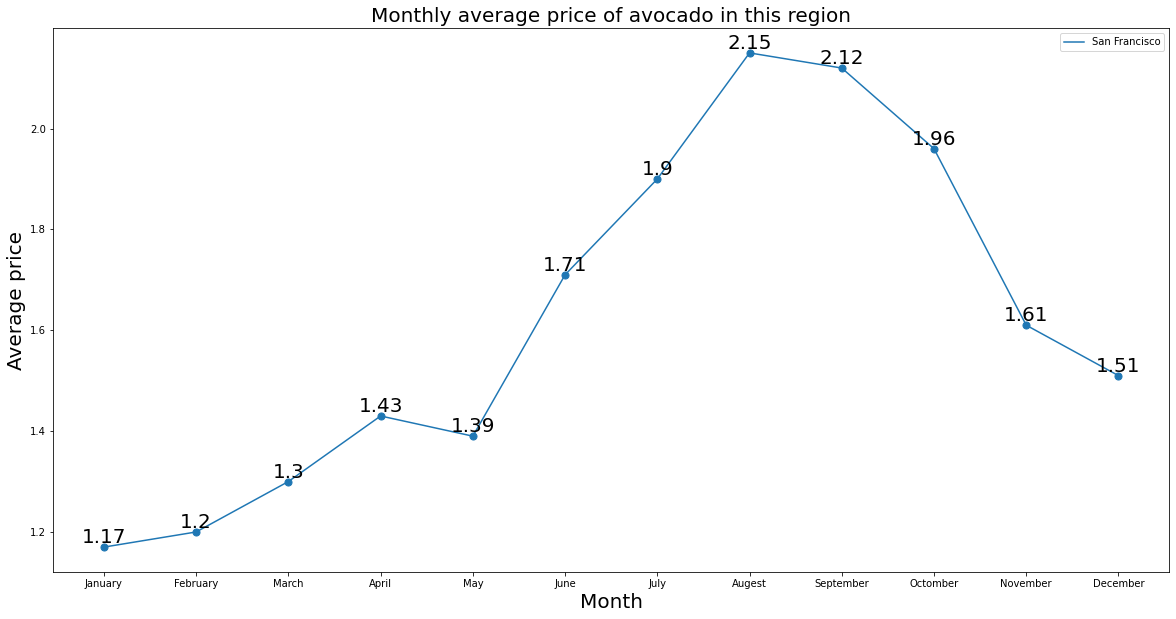

In [27]:
get_average_monthly_plot(y)

### 2016 monthly average price in SF.

I put the data that year is 2016 into a dataframe called "SF2016".The following codes are using the defination "get_average_monthly_price" and "get_average_monthly_plot" that I set before.

[1.57 1.7  1.84 1.76 1.57 1.85 1.89 1.78 1.92 2.33 2.45 1.96]


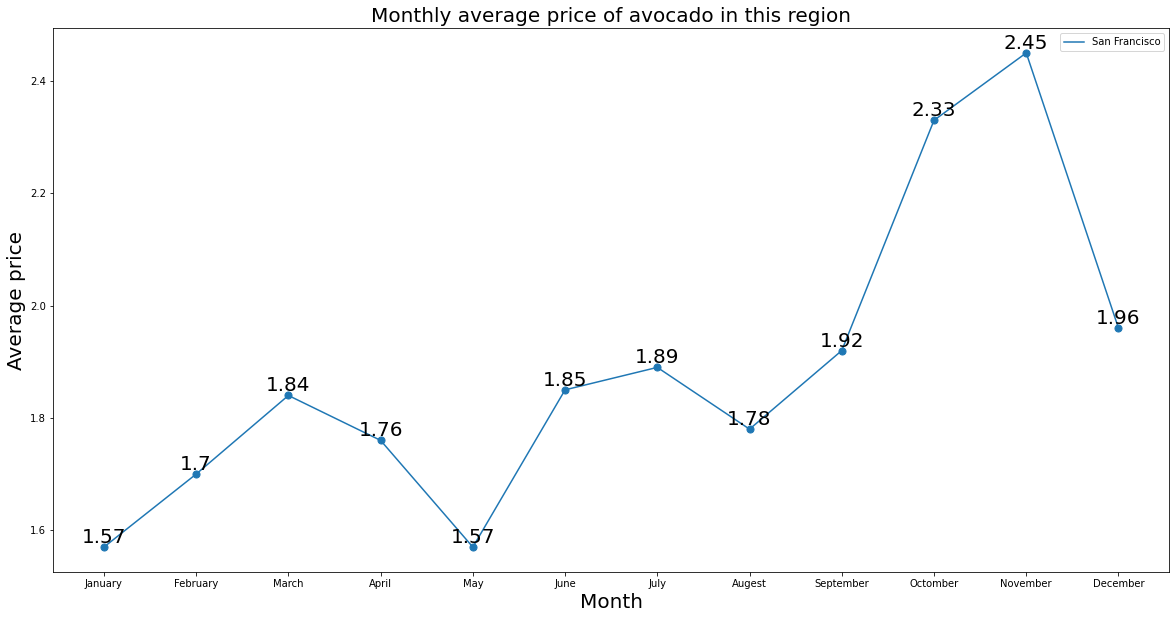

In [28]:
SF2016=SF[SF.year==2016]
y=get_average_monthly_price(SF2016)
get_average_monthly_plot(y)

### 2017 monthly average price in SF.

I put the data that year is 2017 into a dataframe called "SF2017".The following codes are using the defination "get_average_monthly_price" and "get_average_monthly_plot" that I set before.

[1.8  1.7  2.31 2.13 2.17 2.23 2.01 2.24 1.91 1.87 1.74 1.58]


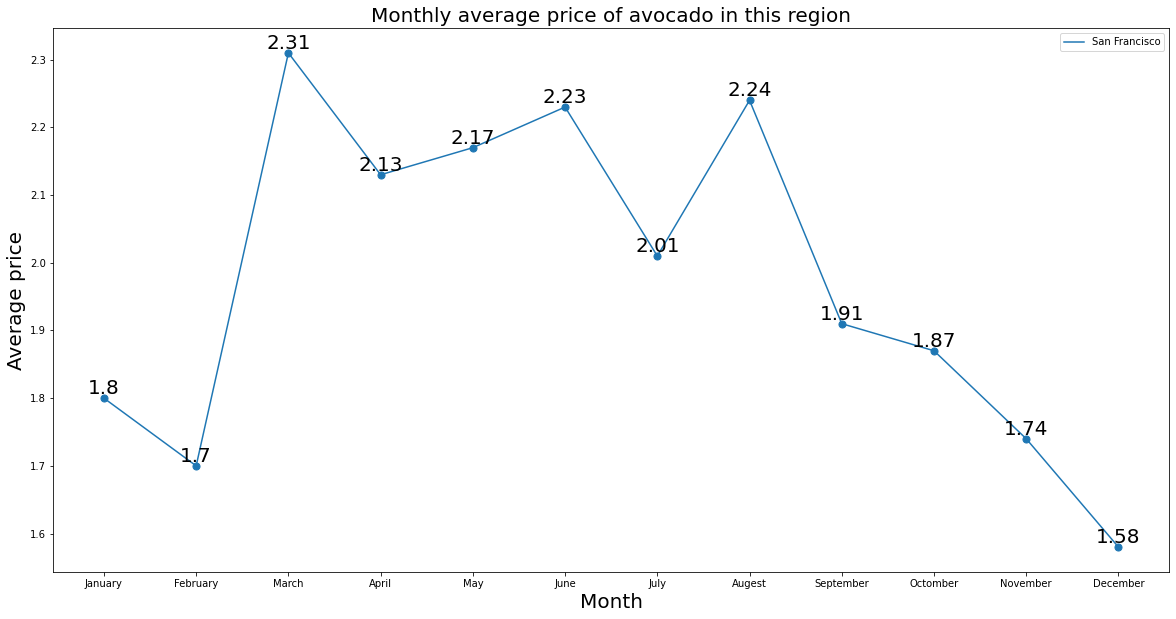

In [29]:
SF2017=SF[SF.year==2017]
y=get_average_monthly_price(SF2017)
get_average_monthly_plot(y)

### 2018 monthly average price in SF.

I put the data that year is 2016 into a dataframe called "SF2016"

In [30]:
SF2018=SF[SF.year==2018]
SF2018.head()

,year,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,No_label
8982,2018,2018-03-25,1.01,1203274.11,198289.36,895797.12,2202.74,0,SanFrancisco,106984.89
8983,2018,2018-03-18,1.38,777300.99,215279.75,435108.21,2698.44,0,SanFrancisco,124214.59
8984,2018,2018-03-11,1.29,904333.98,270255.15,434279.15,2517.79,0,SanFrancisco,197281.89
8985,2018,2018-03-04,1.16,1051308.50,386100.25,426277.63,2512.69,0,SanFrancisco,236417.93
8986,2018,2018-02-25,1.17,984000.13,383689.73,431346.38,2127.86,0,SanFrancisco,166836.16


The following codes are changed because the length of SF2018 is not the same as 2015,2016 and 2017. But the  basic function is the same.

In [31]:

def get_average_monthly_price(df):
    average_price=[]
    sum1=sum2=sum3=sum4=sum5=sum6=sum7=sum8=sum9=sum10=sum11=sum12=0
    count1=count2=count3=count4=count5=count6=count7=count8=count9=count10=count11=count12=0
    for i in range(len(df)):
        date=df.iloc[i,1]

        if (date[5:7]=="01"):
            count1=count1+1
            sum1=sum1+df.iloc[i,2]

        if (date[5:7]=="02"):
            count2=count2+1
            sum2=sum2+df.iloc[i,2]

        if (date[5:7]=="03"):
            count3=count3+1
            sum3=sum3+df.iloc[i,2]

    average_price.append(sum1/count1)
    average_price.append(sum2/count2)
    average_price.append(sum3/count3)

    return average_price

y=get_average_monthly_price(SF2018)

In [32]:
import matplotlib.pyplot as plt

def get_average_monthly_plot(y):
    y=np.round(y,2)
    print(y)
    x=["January","February","March"]

    fig = plt.figure(figsize=(10,5))
    plt.scatter(x=x, y=y,s=50)
    plt.plot(x, y,ls="-",label="San Francisco")

    plt.xlabel("Month", fontsize=20)
    plt.ylabel("Average price", fontsize=20)
    plt.title("Monthly average price of avocado in this region", fontsize=20)
    plt.legend()

    for i in range(3):
        plt.text(i, y[i],y[i] ,ha='center',va= 'bottom', size = 20, alpha = 1)

    plt.show()
    return plt.show()


[1.54 1.54 1.57]


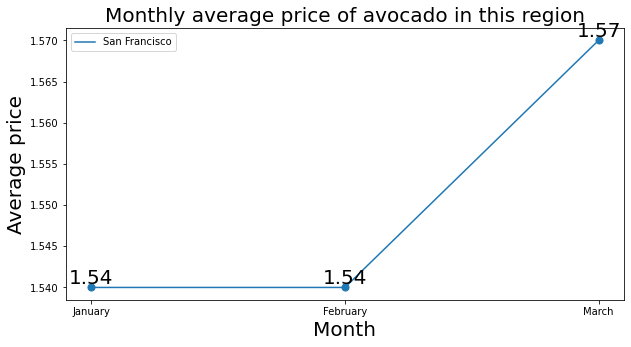

In [33]:
get_average_monthly_plot(y)

### The percentages of different type of avocado in SF2018.

In [34]:
SF2018.head()

,year,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,No_label
8982,2018,2018-03-25,1.01,1203274.11,198289.36,895797.12,2202.74,0,SanFrancisco,106984.89
8983,2018,2018-03-18,1.38,777300.99,215279.75,435108.21,2698.44,0,SanFrancisco,124214.59
8984,2018,2018-03-11,1.29,904333.98,270255.15,434279.15,2517.79,0,SanFrancisco,197281.89
8985,2018,2018-03-04,1.16,1051308.50,386100.25,426277.63,2512.69,0,SanFrancisco,236417.93
8986,2018,2018-02-25,1.17,984000.13,383689.73,431346.38,2127.86,0,SanFrancisco,166836.16


In this part I get the sum of each PLU avocado.

In [35]:
PLU4046 = SF2018['4046'].sum()
PLU4225 = SF2018['4225'].sum()
PLU4770 = SF2018['4770'].sum()
No_label =SF2018['No_label'].sum()

Then I use pie plot to show the percentages of each PLU. I create list "Amount" to store volume and list "Labels" to store name of PLU.

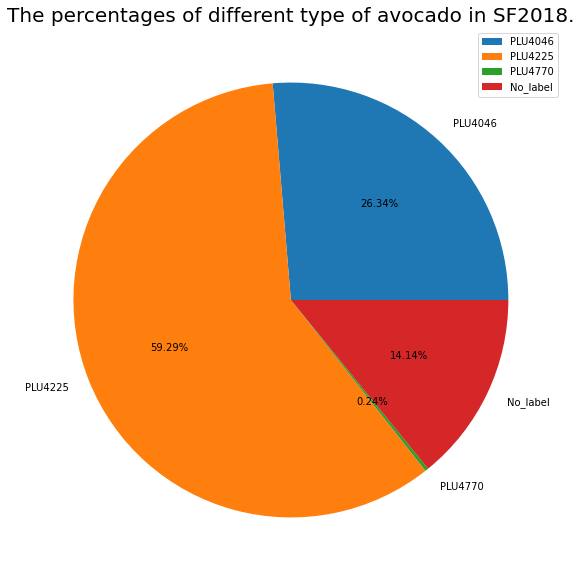

In [36]:
Amount=[PLU4046,PLU4225,PLU4770,No_label]
Labels=["PLU4046","PLU4225","PLU4770","No_label"]

plot=plt.figure(figsize=(10,10))
plt.pie(x=Amount, labels=Labels, autopct='%1.2f%%')
plt.title("The percentages of different type of avocado in SF2018.", fontsize=20)
plt.legend(loc=1)

plt.show()

### The cluster of "conventional" and "organic" with average price and volumn.

Because scattor can't find the column that name has a blank " ", so I assign the data into a new dataframe called "SF20188" and rename the "Total Volume" column as "Total_Volume".

In [37]:
SF20188=pd.DataFrame()
SF20188["year"]=SF2018['year']
SF20188["Date"]=SF2018['Date']
SF20188["AveragePrice"]=SF2018['AveragePrice']
SF20188["Total_Volume"]=SF2018['Total Volume']
SF20188["4046"]=SF2018['4046']
SF20188["4225"]=SF2018['4225']
SF20188["4770"]=SF2018['4770']
SF20188["type"]=SF2018['type']
SF20188["region"]=SF2018['region']
SF20188["No_label"]=SF2018['No_label']
SF20188.head()

,year,Date,AveragePrice,Total_Volume,4046,4225,4770,type,region,No_label
8982,2018,2018-03-25,1.01,1203274.11,198289.36,895797.12,2202.74,0,SanFrancisco,106984.89
8983,2018,2018-03-18,1.38,777300.99,215279.75,435108.21,2698.44,0,SanFrancisco,124214.59
8984,2018,2018-03-11,1.29,904333.98,270255.15,434279.15,2517.79,0,SanFrancisco,197281.89
8985,2018,2018-03-04,1.16,1051308.50,386100.25,426277.63,2512.69,0,SanFrancisco,236417.93
8986,2018,2018-02-25,1.17,984000.13,383689.73,431346.38,2127.86,0,SanFrancisco,166836.16


In this part I use avocado['Total Volume'] as x and avocado['AveragePrice'] as y in scatter plot. 

And I use avocado['type']=avocado['type'].astype(int) to assign different color to show "conventional"(orange) or "organic"(green). 

I create an array with orange and green color. So [0] means orange, [1] means green.

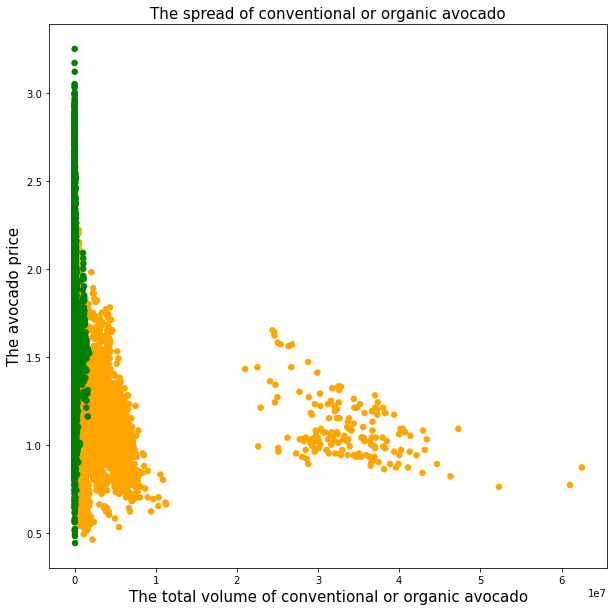

In [38]:
x=avocado['Total Volume']
y=avocado['AveragePrice']
c=avocado['type']=avocado['type'].astype(int)

fig = plt.figure(figsize=(10,10))

colormap = np.array([ 'orange', 'green'])
 
plt.scatter(x=x, y=y, c = colormap[c], s = 30)

plt.ylabel("The avocado price",fontsize=15)
plt.xlabel("The total volume of conventional or organic avocado",fontsize=15)
plt.title('The spread of conventional or organic avocado',fontsize=15)
plt.show()

 # Step-by-step hierarchical clustering: 
 

## Data preparation
I want to analyze the data "region","AveragePrice","Total Volume" and "4225" in 2018.

In [39]:
avocado2018=avocado[avocado.year == 2018]
avocado2018.head()

,year,Date,AveragePrice,Total Volume,4046,4225,4770,type,region,No_label
8478,2018,2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,0,Albany,23924.33
8479,2018,2018-03-18,1.35,105304.65,13234.86,61037.58,55.00,0,Albany,30977.21
8480,2018,2018-03-11,1.12,144648.75,15823.35,110950.68,70.00,0,Albany,17804.72
8481,2018,2018-03-04,1.08,139520.60,12002.12,105069.57,95.62,0,Albany,22353.29
8482,2018,2018-02-25,1.28,104278.89,10368.77,59723.32,48.00,0,Albany,34138.80


In [40]:
avocado2018=avocado2018[["region","AveragePrice","Total Volume","4225"]]
avocado2018.head()

,region,AveragePrice,Total Volume,4225
8478,Albany,1.57,149396.50,109045.03
8479,Albany,1.35,105304.65,61037.58
8480,Albany,1.12,144648.75,110950.68
8481,Albany,1.08,139520.60,105069.57
8482,Albany,1.28,104278.89,59723.32


According to groupby() function and mean() function, I can get region names, mean of "AveragePrice","Total Volume" and "4225".

In [41]:
avocado2018[["region","Total Volume"]].groupby('region').mean().head()

,Total Volume
region,
Albany,64249.423750
Atlanta,342975.935417
BaltimoreWashington,506620.958333
Boise,50614.982083
Boston,359875.248333


In [42]:
region=["Albany","Atlanta",
       "BaltimoreWashington","Boise","Boston","BuffaloRochester","California","Charlotte","Chicago","CincinnatiDayton",
"Columbus","DallasFtWorth","Denver","Detroit","GrandRapids","GreatLakes","HarrisburgScranton","HartfordSpringfield","Houston",
       "Indianapolis",
"Jacksonville","LasVegas","LosAngeles","Louisville","MiamiFtLauderdale","Midsouth","Nashville","NewOrleansMobile","NewYork","Northeast",
       "NorthernNewEngland",
"Orlando","Philadelphia","PhoenixTucson","Pittsburgh","Plains","Portland","RaleighGreensboro","RichmondNorfolk","Roanoke","Sacramento",
"SanDiego","SanFrancisco","Seattle","SouthCarolina","SouthCentral","Southeast","Spokane","StLouis","Syracuse","Tampa","TotalUS","West",
       "WestTexNewMexico"]

In [43]:
avocado2018[["region","Total Volume"]].groupby('region').mean().head()

,Total Volume
region,
Albany,64249.423750
Atlanta,342975.935417
BaltimoreWashington,506620.958333
Boise,50614.982083
Boston,359875.248333


In [44]:
Total_Volume=[
6.424942e+04,3.429759e+05,5.066210e+05,5.061498e+04,3.598752e+05,8.849242e+04,3.489221e+06,1.494121e+05,4.839263e+05,1.499286e+05,1.184958e+05
,7.571561e+05,4.935564e+05,2.509566e+05,1.070610e+05,2.215028e+06,1.625755e+05,1.869892e+05,8.326049e+05,1.211948e+05,1.128502e+05,1.872346e+05
,1.585516e+06,6.131504e+04,4.058925e+05,2.013058e+06,1.463481e+05,1.693317e+05,9.887190e+05,2.763481e+06,2.765070e+05,2.464558e+05,2.736349e+05
,7.505336e+05,7.922999e+04,1.167836e+06,3.499079e+05,1.995373e+05,1.664510e+05,1.037821e+05,2.861562e+05,2.780771e+05,5.409691e+05,3.308789e+05
,2.431701e+05,3.804321e+06,2.511853e+06,5.107889e+04,1.057358e+05,4.362449e+04,2.767523e+05,2.181801e+07,3.853212e+06,4.917009e+05
]


In [45]:
avocado2018[["region","AveragePrice"]].groupby('region').mean().head()

,AveragePrice
region,
Albany,1.435833
Atlanta,1.288750
BaltimoreWashington,1.378333
Boise,1.492500
Boston,1.576667


In [46]:
AveragePrice=[
1.435833,1.288750,1.378333,1.492500,1.576667,1.226250,1.411250,1.482500,1.561667,1.275833,1.171667,1.102917,1.280833
,1.177917,1.328333,1.278333,1.336667,1.677500,1.042083,1.168333,1.456667,1.393750,1.351667,1.267917,1.344167,1.358333
,1.222500,1.204167,1.574583,1.474167,1.421250,1.354583,1.448750,1.155000,1.275417,1.359583,1.396250,1.535000,1.235000
,1.285833,1.472083,1.477917,1.549583,1.455000,1.268333,1.104583,1.302917,1.425000,1.465833,1.250417,1.330833,1.307083
,1.297083,1.251250]

In [47]:
avocado2018[["region","4225"]].groupby('region').mean().head()

,4225
region,
Albany,47775.259167
Atlanta,23310.858750
BaltimoreWashington,289114.023750
Boise,2408.000833
Boston,274883.093333


In [48]:
PLU4225=[
4.777526e+04,2.331086e+04,2.891140e+05,2.408001e+03,2.748831e+05,3.950086e+04,1.181923e+06,4.601242e+04,2.773842e+05,1.894401e+04,1.560841e+04
,1.235662e+05,1.330798e+05,5.030036e+04,4.478728e+04,6.786221e+05,6.852177e+04,1.413171e+05,9.056609e+04,2.805557e+04,7.005733e+03,5.966517e+04
,2.611934e+05,1.692768e+04,3.484468e+04,7.080508e+05,7.539656e+03,1.287072e+04,6.193436e+05,1.709281e+06,2.133985e+05,1.714198e+04,1.397069e+05
,1.408046e+05,1.066368e+04,2.983183e+05,1.328703e+05,6.055467e+04,5.124265e+04,2.367541e+04,1.571800e+05,8.981474e+04,3.207388e+05,9.855450e+04
,3.973959e+04,5.422106e+05,2.116798e+05,1.498025e+04,5.009459e+03,2.364588e+04,2.270436e+04,6.297959e+06,9.678729e+05,9.707539e+04
    
]

Put data together

In [49]:
from pandas import Series, DataFrame
cluster_data=pd.DataFrame()

cluster_data["Average_Price"]=AveragePrice
cluster_data["Total_Volume"]=Total_Volume
cluster_data["PLU4225"]=PLU4225
#cluster_data.index = Series(region)
cluster_data.head()

,Average_Price,Total_Volume,PLU4225
0,1.435833,64249.42,47775.260
1,1.288750,342975.90,23310.860
2,1.378333,506621.00,289114.000
3,1.492500,50614.98,2408.001
4,1.576667,359875.20,274883.100


## Step-by-step: 


### Data preparation again

I want to know which regions are similar to each other in Average Price, Total Volume and Sales of PLU4225 between 2015 to 2018. But there is an outlier so I drop it first.

In [50]:
Dend_data=cluster_data[["Average_Price","Total_Volume"]]
Dend_data=Dend_data.drop([51])

### Normalized data

In [51]:
norm_Dend_data = round((Dend_data - Dend_data.min())/
                          (Dend_data.max() - Dend_data.min()),2)
norm_Dend_data.head()

,Average_Price,Total_Volume
0,0.62,0.01
1,0.39,0.08
2,0.53,0.12
3,0.71,0.00
4,0.84,0.08


### Get euclidean distances

In [52]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import euclidean_distances
Region_distance_df = DataFrame(euclidean_distances(norm_Dend_data))
round(Region_distance_df, 2)
Region_distance_df.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.000000,0.240416,0.142127,0.090554,0.230868,0.330000,0.890898,0.072801,0.228254,0.250799,...,0.076158,0.263059,1.109414,0.673573,0.022361,0.050990,0.290172,0.177200,1.014150,0.310161
1,0.240416,0.000000,0.145602,0.329848,0.450000,0.122066,0.841724,0.304138,0.431856,0.053852,...,0.260000,0.042426,0.955092,0.570351,0.224722,0.286356,0.100000,0.063246,0.920054,0.072111
2,0.142127,0.145602,0.000000,0.216333,0.312570,0.264008,0.781601,0.183576,0.290000,0.183576,...,0.126491,0.183848,0.970464,0.543415,0.138924,0.172047,0.233238,0.100000,0.889550,0.200000
3,0.090554,0.329848,0.216333,0.000000,0.152643,0.420119,0.909340,0.036056,0.162788,0.341321,...,0.100000,0.353553,1.162841,0.715891,0.110000,0.044721,0.380000,0.266833,1.046948,0.398497
4,0.230868,0.450000,0.312570,0.152643,0.000000,0.554437,0.860233,0.158114,0.044721,0.472652,...,0.190000,0.480937,1.172902,0.714003,0.252982,0.180278,0.516236,0.390512,1.019804,0.511566


### Step Start 

#### Data preparation
I don't want to change data structure so I use copy() to copy the values in Region_distance_df.

In [53]:
heriacheal_data=Region_distance_df.copy()
heriacheal_data.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.000000,0.240416,0.142127,0.090554,0.230868,0.330000,0.890898,0.072801,0.228254,0.250799,...,0.076158,0.263059,1.109414,0.673573,0.022361,0.050990,0.290172,0.177200,1.014150,0.310161
1,0.240416,0.000000,0.145602,0.329848,0.450000,0.122066,0.841724,0.304138,0.431856,0.053852,...,0.260000,0.042426,0.955092,0.570351,0.224722,0.286356,0.100000,0.063246,0.920054,0.072111
2,0.142127,0.145602,0.000000,0.216333,0.312570,0.264008,0.781601,0.183576,0.290000,0.183576,...,0.126491,0.183848,0.970464,0.543415,0.138924,0.172047,0.233238,0.100000,0.889550,0.200000
3,0.090554,0.329848,0.216333,0.000000,0.152643,0.420119,0.909340,0.036056,0.162788,0.341321,...,0.100000,0.353553,1.162841,0.715891,0.110000,0.044721,0.380000,0.266833,1.046948,0.398497
4,0.230868,0.450000,0.312570,0.152643,0.000000,0.554437,0.860233,0.158114,0.044721,0.472652,...,0.190000,0.480937,1.172902,0.714003,0.252982,0.180278,0.516236,0.390512,1.019804,0.511566


#### Replace 0 with 10.
This step is used to avoid 0, which could be recognized as minimum distance.

In [54]:
heriacheal_data.replace(0, 10,inplace = True) 
heriacheal_data.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,10.000000,0.240416,0.142127,0.090554,0.230868,0.330000,0.890898,0.072801,0.228254,0.250799,...,0.076158,0.263059,1.109414,0.673573,0.022361,0.050990,0.290172,0.177200,1.014150,0.310161
1,0.240416,10.000000,0.145602,0.329848,0.450000,0.122066,0.841724,0.304138,0.431856,0.053852,...,0.260000,0.042426,0.955092,0.570351,0.224722,0.286356,0.100000,0.063246,0.920054,0.072111
2,0.142127,0.145602,10.000000,0.216333,0.312570,0.264008,0.781601,0.183576,0.290000,0.183576,...,0.126491,0.183848,0.970464,0.543415,0.138924,0.172047,0.233238,0.100000,0.889550,0.200000
3,0.090554,0.329848,0.216333,10.000000,0.152643,0.420119,0.909340,0.036056,0.162788,0.341321,...,0.100000,0.353553,1.162841,0.715891,0.110000,0.044721,0.380000,0.266833,1.046948,0.398497
4,0.230868,0.450000,0.312570,0.152643,10.000000,0.554437,0.860233,0.158114,0.044721,0.472652,...,0.190000,0.480937,1.172902,0.714003,0.252982,0.180278,0.516236,0.390512,1.019804,0.511566


#### First step

Get two closet points.

In [55]:
minvalue=1
for i in range(53):
    for j in range(53):
        if (heriacheal_data.iloc[i,j]<minvalue):
            minvalue=heriacheal_data.iloc[i,j]
            m=i
            n=j
        else:
            minvalue=minvalue
            
print(minvalue,m,n)

0.009999999999999449 40 41


So we can see row 40 and row 41 are the most similar(0.00999) to each other. So they can combine as a cluster.

In [56]:
minvalue2=1
newrow=[]
for i in range(53):

    if (heriacheal_data.iloc[m,i]<heriacheal_data.iloc[n,i]):
        minvalue2=heriacheal_data.iloc[m,i]

    else:
        minvalue2=heriacheal_data.iloc[n,i]

    newrow.append(minvalue2)
            
print(newrow)

[0.07810249675906686, 0.29068883707497256, 0.16155494421403532, 0.06324555320336761, 0.1513274595042153, 0.3931920650267501, 0.8459314393022641, 0.029999999999999274, 0.143178210632763, 0.31144823004794886, 0.48166378315169184, 0.5943904440685432, 0.3059411708155672, 0.4701063709417264, 0.23345235059857514, 0.596824932455071, 0.2220360331117452, 0.31064449134018157, 0.6963476143421474, 0.48166378315169184, 0.05000000000000058, 0.13152946437965898, 0.389486841883009, 0.3255764119219942, 0.20396078054371145, 0.4939635614091388, 0.4011234224026316, 0.4210700654285461, 0.24207436873820407, 0.65, 0.0800000000000001, 0.19026297590440466, 0.04000000000000057, 0.5166236541235797, 0.3140063693621518, 0.29999999999999993, 0.12165525060596408, 0.09219544457292922, 0.3811823710509184, 0.3026549190084313, 0.009999999999999449, 0.009999999999999449, 0.13038404810405346, 0.036055512754639446, 0.3201562118716425, 1.0960383204979651, 0.6488451279003336, 0.10000000000000005, 0.0412310562561777, 0.355105

This is the the new row of 40and41 called "newrow".

In [57]:
heriacheal_data.loc['40and41'] = newrow
heriacheal_data.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,10.000000,0.240416,0.142127,0.090554,0.230868,0.330000,0.890898,0.072801,0.228254,0.250799,...,0.076158,0.263059,1.109414,0.673573,0.022361,0.050990,0.290172,0.177200,1.014150,0.310161
1,0.240416,10.000000,0.145602,0.329848,0.450000,0.122066,0.841724,0.304138,0.431856,0.053852,...,0.260000,0.042426,0.955092,0.570351,0.224722,0.286356,0.100000,0.063246,0.920054,0.072111
2,0.142127,0.145602,10.000000,0.216333,0.312570,0.264008,0.781601,0.183576,0.290000,0.183576,...,0.126491,0.183848,0.970464,0.543415,0.138924,0.172047,0.233238,0.100000,0.889550,0.200000
3,0.090554,0.329848,0.216333,10.000000,0.152643,0.420119,0.909340,0.036056,0.162788,0.341321,...,0.100000,0.353553,1.162841,0.715891,0.110000,0.044721,0.380000,0.266833,1.046948,0.398497
4,0.230868,0.450000,0.312570,0.152643,10.000000,0.554437,0.860233,0.158114,0.044721,0.472652,...,0.190000,0.480937,1.172902,0.714003,0.252982,0.180278,0.516236,0.390512,1.019804,0.511566


Drop row 40,41 and colum 40,41.

In [58]:
heriacheal_data=heriacheal_data.drop(40).drop(41).drop(40,1).drop(41,1)
heriacheal_data.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,10.000000,0.240416,0.142127,0.090554,0.230868,0.330000,0.890898,0.072801,0.228254,0.250799,...,0.076158,0.263059,1.109414,0.673573,0.022361,0.050990,0.290172,0.177200,1.014150,0.310161
1,0.240416,10.000000,0.145602,0.329848,0.450000,0.122066,0.841724,0.304138,0.431856,0.053852,...,0.260000,0.042426,0.955092,0.570351,0.224722,0.286356,0.100000,0.063246,0.920054,0.072111
2,0.142127,0.145602,10.000000,0.216333,0.312570,0.264008,0.781601,0.183576,0.290000,0.183576,...,0.126491,0.183848,0.970464,0.543415,0.138924,0.172047,0.233238,0.100000,0.889550,0.200000
3,0.090554,0.329848,0.216333,10.000000,0.152643,0.420119,0.909340,0.036056,0.162788,0.341321,...,0.100000,0.353553,1.162841,0.715891,0.110000,0.044721,0.380000,0.266833,1.046948,0.398497
4,0.230868,0.450000,0.312570,0.152643,10.000000,0.554437,0.860233,0.158114,0.044721,0.472652,...,0.190000,0.480937,1.172902,0.714003,0.252982,0.180278,0.516236,0.390512,1.019804,0.511566


In [59]:
heriacheal_data.shape

(52, 51)

I have tried my best to get clusters number of data. This, the first step, is what I can do without function.:(

# Dendrogram

<ipython-input-60-d38a2b0c9f18>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(Region_distance_df, 'average')


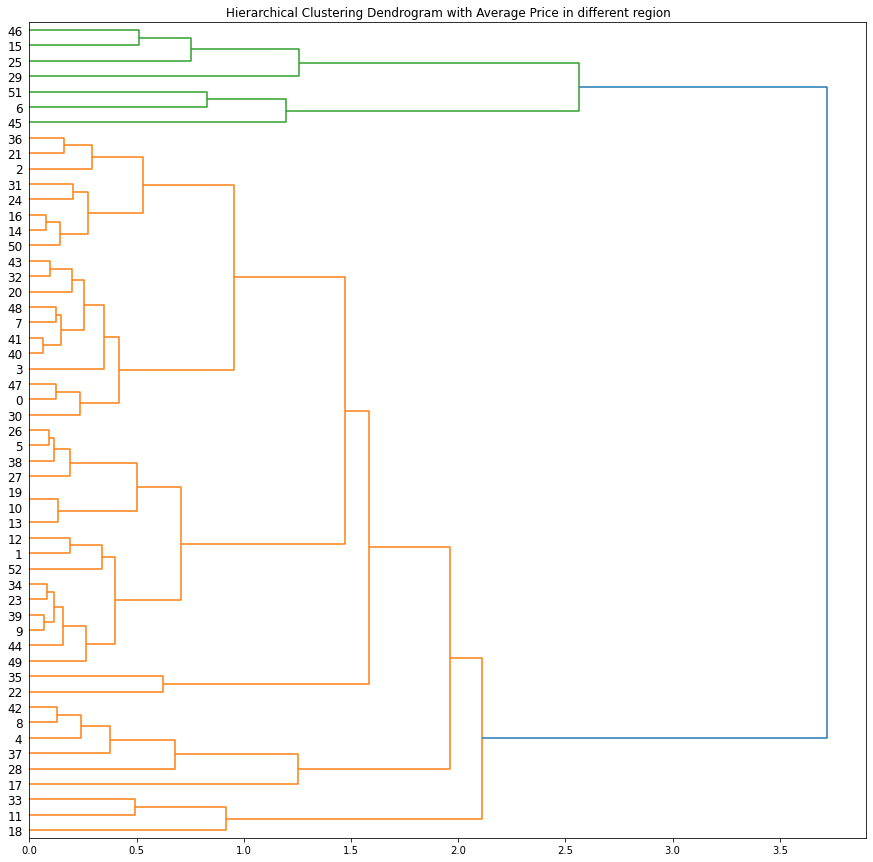

In [60]:
Z = linkage(Region_distance_df, 'average')

plt.figure(figsize=(15, 15))
plt.title('Hierarchical Clustering Dendrogram with Average Price in different region')
dendrogram(Z, orientation="right",leaf_font_size = 12.)
plt.show()

# Step-by-step K-means: 

As we know k=2 is the best numer of clusters. So the following is to get clusters step-by-step K-means. I want to get the PLU4225 and Total Volume's clusters with different region in 2018.

import library again.

In [61]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from scipy.cluster.hierarchy import linkage, dendrogram

## Clustering with K-means

### Show data on plot.

<ipython-input-62-b7dcd59d7006>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


Text(0, 0.5, 'Total Volume')

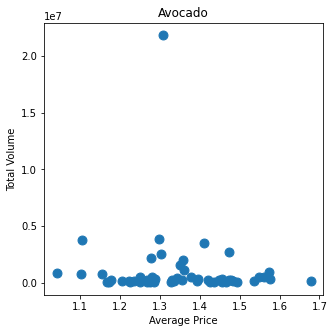

In [62]:
fig = plt.figure(figsize=(5,5))

plt.scatter(cluster_data.Average_Price, cluster_data.Total_Volume, s = 80)
plt.title('Avocado')
ax = fig.add_subplot(111)
ax.set_xlabel('Average Price')
ax.set_ylabel('Total Volume')

### Delet outlier data on plot.
We can see that  there is an isolated data. It is 51st row of the data. So we decide to drop it.

In [63]:
cluster_data=cluster_data.drop([51])

To make the data more fitable, I multiply Average_Price with 1e06.

In [64]:
cluster_data['Average_Price']=cluster_data['Average_Price']*1e06
cluster_data.head()

,Average_Price,Total_Volume,PLU4225
0,1435833.0,64249.42,47775.260
1,1288750.0,342975.90,23310.860
2,1378333.0,506621.00,289114.000
3,1492500.0,50614.98,2408.001
4,1576667.0,359875.20,274883.100


<ipython-input-65-313dc34eda73>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


Text(0, 0.5, 'Total Volume')

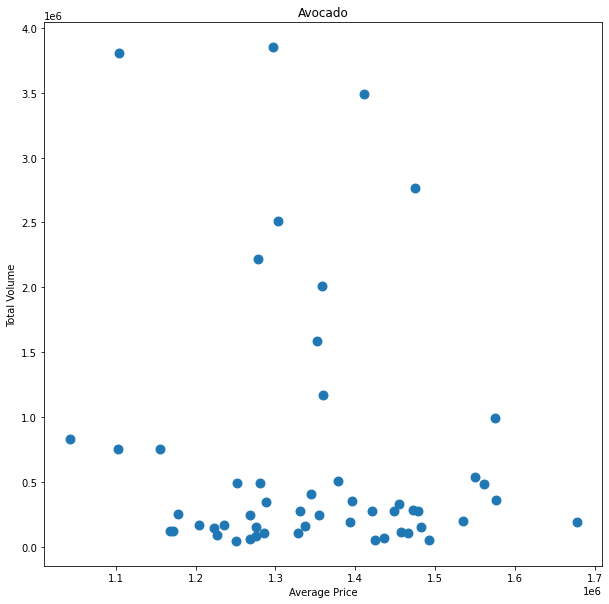

In [65]:
fig = plt.figure(figsize=(10,10))

plt.scatter(cluster_data.Average_Price, cluster_data.Total_Volume, s = 80)
plt.title('Avocado')
ax = fig.add_subplot(111)
ax.set_xlabel('Average Price')
ax.set_ylabel('Total Volume')

### Interation

#### Random Centroids

In [66]:
k=2
import random
centroid=[]
for i in range(k):
    x=random.randint(0,1.7e06)
    y=random.randint(0,4e06)
    centroid.append([x,y])
centroid1=centroid[0]
centroid2=centroid[1]

<ipython-input-67-d1213681b5d1>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


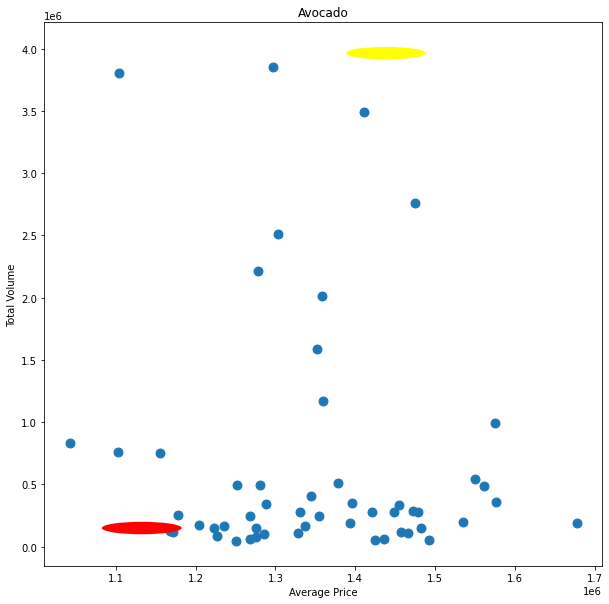

In [67]:

fig = plt.figure(figsize=(10,10))

plt.scatter(cluster_data.Average_Price, cluster_data.Total_Volume, s = 80)
plt.title('Avocado')
ax = fig.add_subplot(111)
ax.set_xlabel('Average Price')
ax.set_ylabel('Total Volume')

circle1 = plt.Circle(centroid1, radius=50000, fc='yellow')
circle2 = plt.Circle(centroid2, radius=50000, fc='red')
#circle3 = plt.Circle(centroid3, radius=50000, fc='blue')

plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)



#### First Iteration

##### Associating Points to Centroids

In [68]:
def associating_points_to_Centroids(df,centroid1,centroid2):


    df["Dist_C1"] = np.sqrt((df.Average_Price - centroid1[0])**2 + (df.Total_Volume - centroid1[1])**2)
    df["Dist_C2"] = np.sqrt((df.Average_Price - centroid2[0])**2 + (df.Total_Volume - centroid2[1])**2)

    df["Association"] = np.where((df.Dist_C1 < df.Dist_C2) , 1, 2)
    return df

In [69]:
associating_points_to_Centroids(cluster_data,centroid1,centroid2).head()

,Average_Price,Total_Volume,PLU4225,Dist_C1,Dist_C2,Association
0,1435833.0,64249.42,47775.260,3.900727e+06,314900.388841,2
1,1288750.0,342975.90,23310.860,3.625082e+06,249340.197097,2
2,1378333.0,506621.00,289114.000,3.458873e+06,434238.453932,2
3,1492500.0,50614.98,2408.001,3.914738e+06,373153.827748,2
4,1576667.0,359875.20,274883.100,3.607759e+06,491845.961657,2


In [70]:
def get_interation_result(df,centroid1,centroid2):
    #,centroid3

    fig = plt.figure(figsize=(10,10))
 
    colormap = np.array(['black', 'yellow', 'red', 'blue'])

    plt.scatter(df.Average_Price, df.Total_Volume, 
                c=colormap[df.Association], s = 80)
    plt.title('Avocado')
    ax = fig.add_subplot(111)
    ax.set_xlabel('Average_Price')
    ax.set_ylabel('Total_Volume')

    circle1 = plt.Circle(centroid1, radius=50000, fc='yellow')
    circle2 = plt.Circle(centroid2, radius=50000, fc='red')
    #circle3 = plt.Circle(centroid3, radius=50000, fc='blue')

    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    #plt.gca().add_patch(circle3)
    return plt.show()


###### First iteration's result

<ipython-input-70-3400b72e1e1f>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


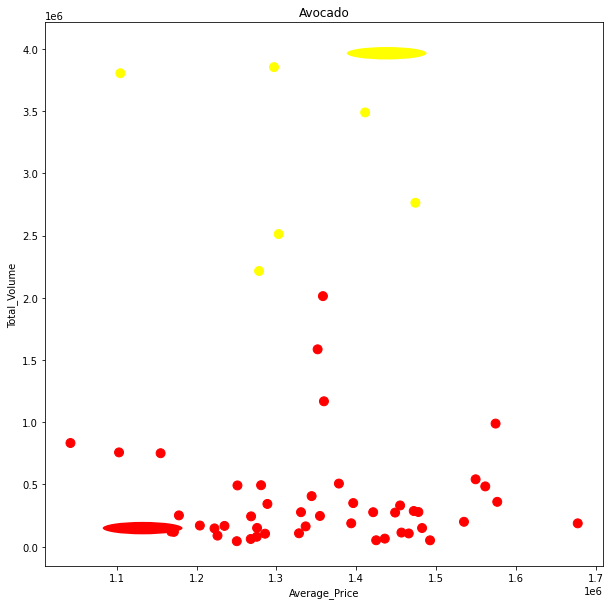

In [71]:
get_interation_result(cluster_data,centroid1,centroid2)

In [72]:
cluster_data[cluster_data.Association == 1].head()

,Average_Price,Total_Volume,PLU4225,Dist_C1,Dist_C2,Association
6,1411250.0,3489221.0,1181923.0,4.765171e+05,3.352141e+06,1
15,1278333.0,2215028.0,678622.1,1.757234e+06,2.071477e+06,1
29,1474167.0,2763481.0,1709281.0,1.202034e+06,2.637020e+06,1
45,1104583.0,3804321.0,542210.6,3.702751e+05,3.655734e+06,1
46,1302917.0,2511853.0,211679.8,1.459406e+06,2.369299e+06,1


In [73]:
cluster_data[cluster_data.Association == 2].head()

,Average_Price,Total_Volume,PLU4225,Dist_C1,Dist_C2,Association
0,1435833.0,64249.42,47775.260,3.900727e+06,314900.388841,2
1,1288750.0,342975.90,23310.860,3.625082e+06,249340.197097,2
2,1378333.0,506621.00,289114.000,3.458873e+06,434238.453932,2
3,1492500.0,50614.98,2408.001,3.914738e+06,373153.827748,2
4,1576667.0,359875.20,274883.100,3.607759e+06,491845.961657,2


#### Second iteration

###### Associating Points to Centroids

In [74]:
centroid1 = cluster_data[cluster_data.Association == 1][["Average_Price", "Total_Volume"]].mean()
centroid2 = cluster_data[cluster_data.Association == 2][["Average_Price", "Total_Volume"]].mean()

<ipython-input-70-3400b72e1e1f>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


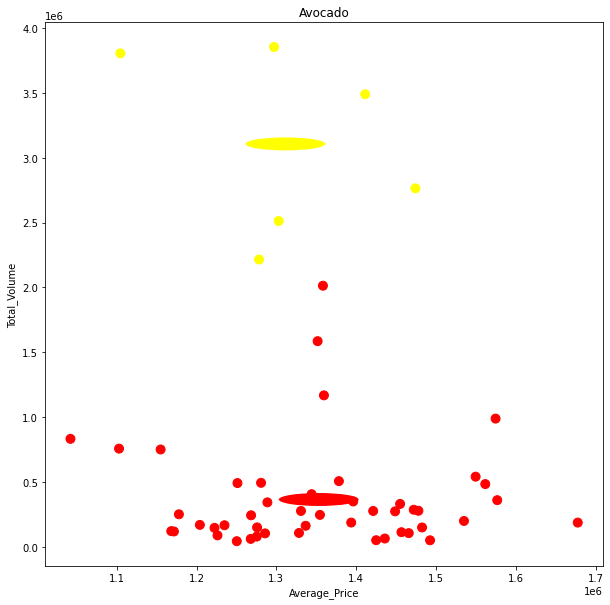

In [75]:
get_interation_result(cluster_data,centroid1,centroid2)

In [76]:
associating_points_to_Centroids(cluster_data,centroid1,centroid2).head()

,Average_Price,Total_Volume,PLU4225,Dist_C1,Dist_C2,Association
0,1435833.0,64249.42,47775.260,3.044481e+06,312029.107202,2
1,1288750.0,342975.90,23310.860,2.763303e+06,67952.430230,2
2,1378333.0,506621.00,289114.000,2.600427e+06,143784.832180,2
3,1492500.0,50614.98,2408.001,3.060934e+06,344020.116602,2
4,1576667.0,359875.20,274883.100,2.759093e+06,223722.358370,2


##### Second iteration's result

<ipython-input-70-3400b72e1e1f>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


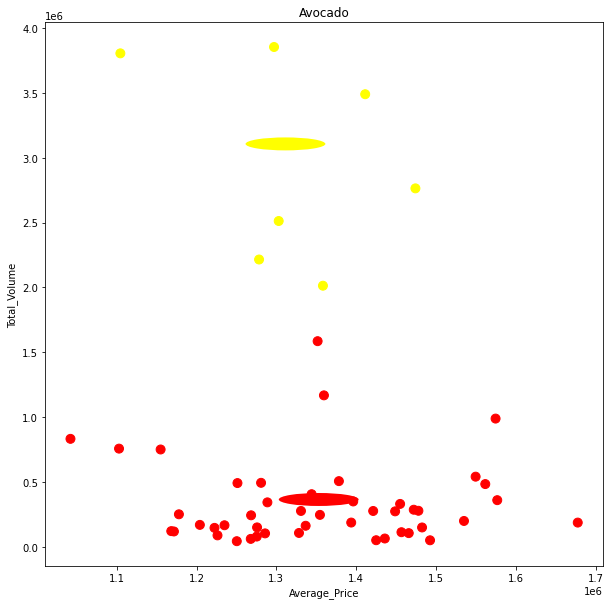

In [77]:
get_interation_result(cluster_data,centroid1,centroid2)

#### Third iteration

##### Associating Points to Controids

In [78]:
centroid1 = cluster_data[cluster_data.Association == 1][["Average_Price", "Total_Volume"]].mean()
centroid2 = cluster_data[cluster_data.Association == 2][["Average_Price", "Total_Volume"]].mean()
associating_points_to_Centroids(cluster_data,centroid1,centroid2).head()

,Average_Price,Total_Volume,PLU4225,Dist_C1,Dist_C2,Association
0,1435833.0,64249.42,47775.260,2.888176e+06,277686.317015,2
1,1288750.0,342975.90,23310.860,2.607214e+06,65589.837434,2
2,1378333.0,506621.00,289114.000,2.444146e+06,179177.737557,2
3,1492500.0,50614.98,2408.001,2.904651e+06,311662.593643,2
4,1576667.0,359875.20,274883.100,2.603024e+06,225862.198317,2


##### Third iteration's result

<ipython-input-70-3400b72e1e1f>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


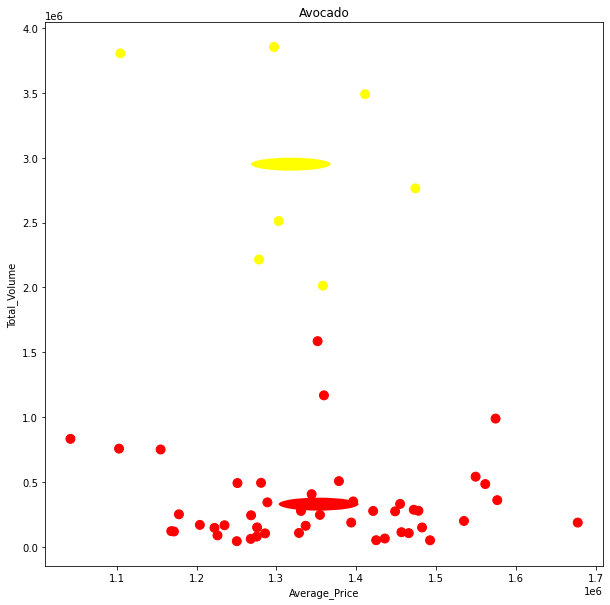

In [79]:
get_interation_result(cluster_data,centroid1,centroid2)

#### Forth iteration

###### Associating Points to Centroids

In [80]:
centroid1 = cluster_data[cluster_data.Association == 1][["Average_Price", "Total_Volume"]].mean()
centroid2 = cluster_data[cluster_data.Association == 2][["Average_Price", "Total_Volume"]].mean()
associating_points_to_Centroids(cluster_data,centroid1,centroid2).head()

,Average_Price,Total_Volume,PLU4225,Dist_C1,Dist_C2,Association
0,1435833.0,64249.42,47775.260,2.888176e+06,277686.317015,2
1,1288750.0,342975.90,23310.860,2.607214e+06,65589.837434,2
2,1378333.0,506621.00,289114.000,2.444146e+06,179177.737557,2
3,1492500.0,50614.98,2408.001,2.904651e+06,311662.593643,2
4,1576667.0,359875.20,274883.100,2.603024e+06,225862.198317,2


###### Forth iteration's result

<ipython-input-70-3400b72e1e1f>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


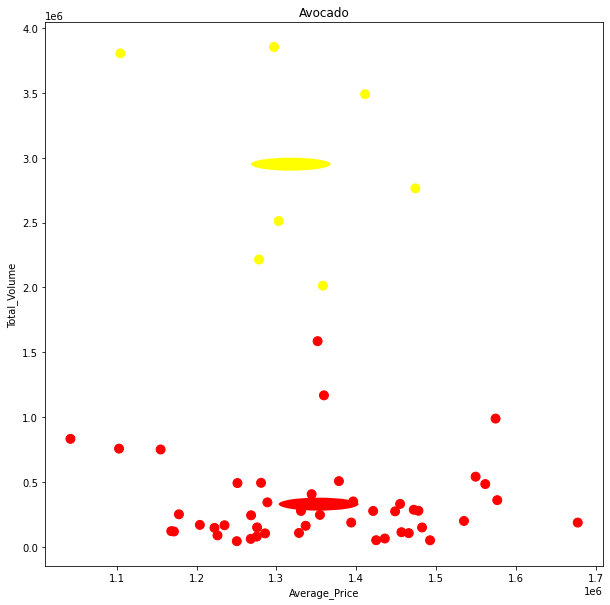

In [81]:
get_interation_result(cluster_data,centroid1,centroid2)

So the right number of k means is 2, and after five times interations the clusters don't change.

# sklearn.cluster: 

Import sklearn from KMeans to use package. And specifiy the data we want to use.

In [82]:
from sklearn.cluster import KMeans
cluster_data.head()

,Average_Price,Total_Volume,PLU4225,Dist_C1,Dist_C2,Association
0,1435833.0,64249.42,47775.260,2.888176e+06,277686.317015,2
1,1288750.0,342975.90,23310.860,2.607214e+06,65589.837434,2
2,1378333.0,506621.00,289114.000,2.444146e+06,179177.737557,2
3,1492500.0,50614.98,2408.001,2.904651e+06,311662.593643,2
4,1576667.0,359875.20,274883.100,2.603024e+06,225862.198317,2


## K Means Cluster

In [83]:
knn_data=cluster_data[["Total_Volume","Average_Price"]]
model = KMeans(n_clusters = 2)
model.fit(knn_data)

KMeans(n_clusters=2)

Get the labels to classfy.

In [84]:
model.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0])

<ipython-input-85-3e8d108e190d>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


Text(0, 0.5, 'Total_Volume')

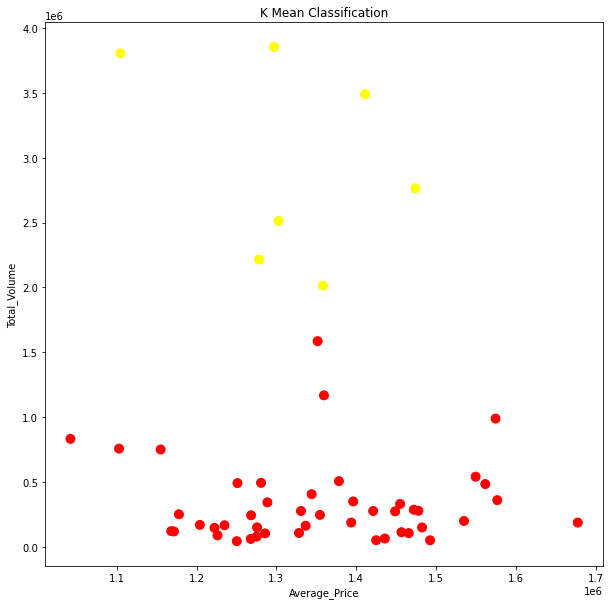

In [85]:
fig = plt.figure(figsize=(10, 10))
 
colormap = np.array(['red', 'yellow'])
 
plt.scatter((knn_data.Average_Price), knn_data.Total_Volume, c=colormap[model.labels_], s = 80)
plt.title('K Mean Classification')
ax = fig.add_subplot(111)
ax.set_xlabel('Average_Price')
ax.set_ylabel('Total_Volume')

The plot is the same as K-means step-by-step.

#  kNN Function: 


## Build data

In [86]:
kNN_cluster_data=pd.DataFrame()
kNN_cluster_data['Average_Price']=cluster_data['Average_Price']/1e06
kNN_cluster_data['Total_Volume']=cluster_data['Total_Volume']/1e05
kNN_cluster_data['Association']=cluster_data['Association']
kNN_cluster_data.head()

,Average_Price,Total_Volume,Association
0,1.435833,0.642494,2
1,1.288750,3.429759,2
2,1.378333,5.066210,2
3,1.492500,0.506150,2
4,1.576667,3.598752,2


## Build function

In [87]:
from sklearn.neighbors import KNeighborsClassifier

def plotMesh(df,k):
    
    knn = KNeighborsClassifier(n_neighbors = k, p = 2)# p=2 for euclidean distance
    knn.fit(df[["Average_Price", "Total_Volume"]], df.Association)
    
    h = 0.1

    cmap_light = ListedColormap([ '#ffe4b5','#ffa07a'])
    colormap = np.array([ 'yellow', 'red', 'blue'])

    x_min, x_max = df.Average_Price.min(), df.Average_Price.max() 
    y_min, y_max = df.Total_Volume.min(), df.Total_Volume.max() 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(10, 10))
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

    plt.scatter(df.Average_Price, df.Total_Volume, c = colormap[df.Association-1], s = 50)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Class classification of Region:\nRegion Group 1 - Red\nRegion Group 2 - Yellow\n'")
    ax = fig.add_subplot(111)
    ax.set_xlabel('Average_Price')
    ax.set_ylabel('Total_Volume')
    
    return plot.show()

In [88]:
knn = KNeighborsClassifier(n_neighbors = k, p = 2)
knn.fit(cluster_data[["Average_Price", "Total_Volume"]], cluster_data.Association)

KNeighborsClassifier(n_neighbors=2)

## Get the clustering.

df is kNN_cluster_data, and k is 2.

<ipython-input-87-ce952d127521>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
<ipython-input-87-ce952d127521>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
<ipython-input-87-ce952d127521>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  return plot.show()


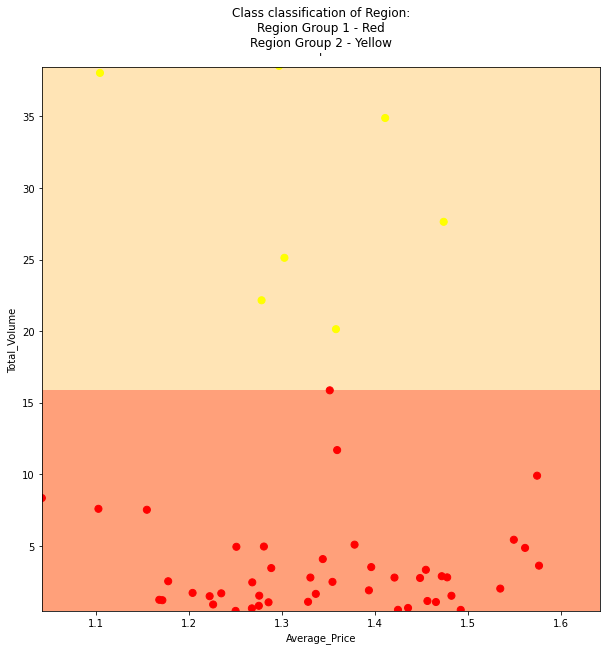

In [89]:
plotMesh(kNN_cluster_data,2)

## make prediction

A data-point called "test_region"

In [90]:
kNN_cluster_data.head()

,Average_Price,Total_Volume,Association
0,1.435833,0.642494,2
1,1.288750,3.429759,2
2,1.378333,5.066210,2
3,1.492500,0.506150,2
4,1.576667,3.598752,2


In [91]:
knndf=kNN_cluster_data[["Average_Price", "Total_Volume","Association"]]

In [92]:
knndf.head()

,Average_Price,Total_Volume,Association
0,1.435833,0.642494,2
1,1.288750,3.429759,2
2,1.378333,5.066210,2
3,1.492500,0.506150,2
4,1.576667,3.598752,2


In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2, p = 2)
knn.fit(knndf[['Average_Price', 'Total_Volume']], 
        knndf.Association)

KNeighborsClassifier(n_neighbors=2)

Make prediction

In [ ]:
Average_Price = float(input('Average_Price'))
Total_Volume = float(input('Total_Volume'))

data_class = knn.predict(np.array([Average_Price, Total_Volume]).reshape(1, -1))[0]

class_name = ["N/A", "Yellow", "Red"]

print('Prediction: Loan is #', 3- data_class, class_name[data_class])

# Suggestion:

1. SouthCentral, DallasFtWorth and Houston are the lowest three region of avocado price..

2. The trends of avocado price in SouthCentral, DallasFtWorth and Houston are the same. Lowest in 2016 and highest in 2017. 

3. San Francisco suggestion: 

    2015 January(1.17)
    
    2016 January(1.57) and May(1.57)
    
    2017 December (1.58) 
    
    2018 January(1.54) and February(1.54)

4. PLU4225 avocado is the most popular (59.25%) avocado in SF 2018.

5. The clusters of "conventional" and "organic" shows "organic" has high price but low sales. Most of the "conventional" are lower 2.0 but sales more than "organic" .

6. According to price and volume, we can seperate regions into two parts. And we can also predict which region does it belong to according to average price and total volume.

# Project Report

## Objective of the Proposed Research:

It is well known that Avocado has a lot of nutrients. Avocado becomes popular especially among Millenials in recent years. So there is a question: Which city has the cheapest price of avocado? When is a good time to buy cheap avocado? So we get the data on Kaggle. The original data comes directly from retailers' cash registers based on actual retail sales of Hass avocados.

The data has 13 columns. We will explore this data set and make the following researches:

1.Get the average avocado price during 2015-2018 in different regions.

2.Find the trend of avocado price in different years in the lowest three regions about avocado price

3.More detail in San Francisco: We can get the trend of avocado prices in different years in SF.

4.Find The percentages of different types of avocado in SF2018.

5.Find the clusters of "conventional" and "organic" with average price and volume.

Finally, we will give suggestions about which region are good choices to buy avocado. 
And we will tell when avocado has the lowest price in San Francisco. Also, we can give a cluster of "conventional" and "organic" with average price and volume.
Import pandas, NumPy, and CSV called "avocado". The dataframe is also called "avocado".

## Data Exploration

We Show top 5 rows of the dataset, dimension,type of data in each column and the number of NA,and basic statistic information.

## Data Cleaning
According to our research, we drop "Total Bags","Small Bags", "Large Bags" and "XLarge Bags".

## Adaptation

Add a column called No_label and Change the type column. We change the string as numeric because if we want to have different color dot, we need the numeric parameter to assign the color.So we change "conventional" type into 0 and "organic" type equals to 1. We use for loop and if statement. The "18249" is the length of dataset. So we set for loop as range(18249).

## Visualization
Visualization 1 : Average price from 2015 to 2018 in different region.
We assign "AveragePrice" and "region" from avocado in a new dataframe called avocado1.Then We use groupby() by 'region' and describe to get the names of region and the average price in each region. We input regions and averageprice into two list by hand. It's really tired for me! Then We assign the data into a dataframe called "v1_data". And order it in ascending order by "Average_price". In this part we use barplot to show Average price from 2015 to 2018 in different region. 


Visualization 2 : The trend of avocado price from 2015 to 2018.The SouthCentral we use filter function to get "SouthCentral" data. Put the data that region is "SouthCentral" into a dataframe called "SouthCentral".Then we define a defination called "average_price_get". The parameter df is used to input data.
In the def:
we select df("Region") as a variable called 'regionname'. It is used to show label in the following plot, which is so convenient.
we use for loop and if statement to get the sum of "Average_price" called sum1-sum4 in different year. we only need to check first 4 character in a string,which comes from df("Date) to know which year does this row belong.
Then we get the count called count1-count4 of each year. Then to get a list of average price, we use .append function.
Finally, we return a list that has average_price and region name.

And this part weI define a defination called "plot_get_average_price". The parameter y is used to input data to make a plot.
In the def:
we define a list called x that has 2015 to 2018.
we assign the first element of y as the y value of plot.
we assign the second element of y as the label of line.
To show the specific value of y, we use np.round(y[0],2) to show them more clear.
we use for loop to put values above the dots.
Finally, we return plt.show() to show the plot.


Visualization 3: SanFrancisco
we use filter function to get "San Francisco" data. Put the data that region is "San Francisco" into a dataframe called "SF".
Then we define a defination called "get_average_monthly_price". The parameter df is used to input data.
In the def:
we use for loop and if statement to get the sum of "average_price" called sum1-sum12 in different month. we only need to check the characters in sixth position and seventh position, which means month number , in a string to know which month does this row belong to.
Then we get the count called count1-count12 of each year. Then to get a list of average price, we use .append function.
we set range(len(df)) because when the year is 2018, the length of data is not the same as 2015,2016 and 2017. So length should be diy.
Finally, we return a variable called average_price.
And this part we define a defination called "get_average_monthly_plot". The parameter y is used to input data to make a plot.
In the def:
To show the specific value of y, we use np.round(y,2) to show them more clear.
we define a list called x. which means month.
we use for loop to put values above the dots. range(12) means 12 months, y means the average in that month.
Finally, we return plt.show() to show the plot.

## Step-by-step hierarchical clustering
Data preparation:
We want to analyze the data "region","AveragePrice","Total Volume" and "4225" in 2018.
According to groupby() function and mean() function, we can get region names, mean of "AveragePrice","Total Volume" and "4225".
Data preparation again: We want to know which regions are similar to each other in Average Price, Total Volume and Sales of PLU4225 between 2015 to 2018. But there is an outlier so we drop it first.

## Dendrogram & Step-by-step K-means
Step-by-step K-means:
As we know k=2 is the best numer of clusters. So the following is to get clusters step-by-step K-means. We want to get the PLU4225 and Total Volume's clusters with different region in 2018. Import library again. Clustering with K-means Show data on plot.
Delet outlier data on plot. We can see that there is an isolated data. It is 51st row of the data. So we decide to drop it.
First Iteration and Associating Points to Centroids.Second iteration and Associating Points to Centroids. Forth iteration and Associating Points to Centroids.

## sklearn.cluster

Import sklearn from KMeans to use package. And specifiy the data we want to use. Get the labels to classfy. And the plot is the same as K-means step-by-step.

## kNN Function

Get the labels to classfy.
kNN Function: Build data,function,and Get the clustering.Also make prediction.

## Suggestion:

SouthCentral, DallasFtWorth and Houston are the lowest three region of avocado price..

The trends of avocado price in SouthCentral, DallasFtWorth and Houston are the same. Lowest in 2016 and highest in 2017.

San Francisco suggestion:

2015 January(1.17)

2016 January(1.57) and May(1.57)

2017 December (1.58)

2018 January(1.54) and February(1.54)

PLU4225 avocado is the most popular (59.25%) avocado in SF 2018.

The clusters of "conventional" and "organic" shows "organic" has high price but low sales. Most of the "conventional" are lower 2.0 but sales more than "organic" .

According to price and volume, we can seperate regions into two parts. And we can also predict which region does it belong to according to average price and total volume.

